# Cleaning Data

In [ ]:
import pandas as pd
import re

df = pd.read_csv('car_prices.csv')

# Capitalise Car Brand names
df['make'] = df['make'].str.capitalize()

# Remove 'tk' from the end of car brand names
df['make'] = df['make'].replace(r'[\W]*tk', '', regex=True)

# Correct car brand names
corrections = {
    'Airstream': 'Mercedes-Benz',
    'Aston martin': 'Aston Martin',
    'Bmw': 'BMW',
    'Chev truck': 'Chevrolet',
    'Dot': 'Dodge',
    'Ford truck': 'Ford',
    'Gmc truck': 'GMC',
    'Gmc': 'GMC',
    'Land rover': 'Land Rover',
    'Landrover': 'Land Rover',
    'Mercedes': 'Mercedes-Benz',
    'Mercedes-b': 'Mercedes-Benz',
    'Mercedes-benz':'Mercedes-Benz',
    'Rolls-royce':'Rolls-Royce',
    'Vw':'Volkswagen'
}
df['make'] = df['make'].replace(corrections)

# Save the cleaned df to a new CSV file for visualisation
df.to_csv('cleaned_car_prices.csv')

# Analysing Car Brands with Highest Volume of Sales
- Visualisation of the top 10 car brands based on quantity of cars sold in a bar chart
- Analyse the proportion of the sales where selling price is greater than MMR for each car brand


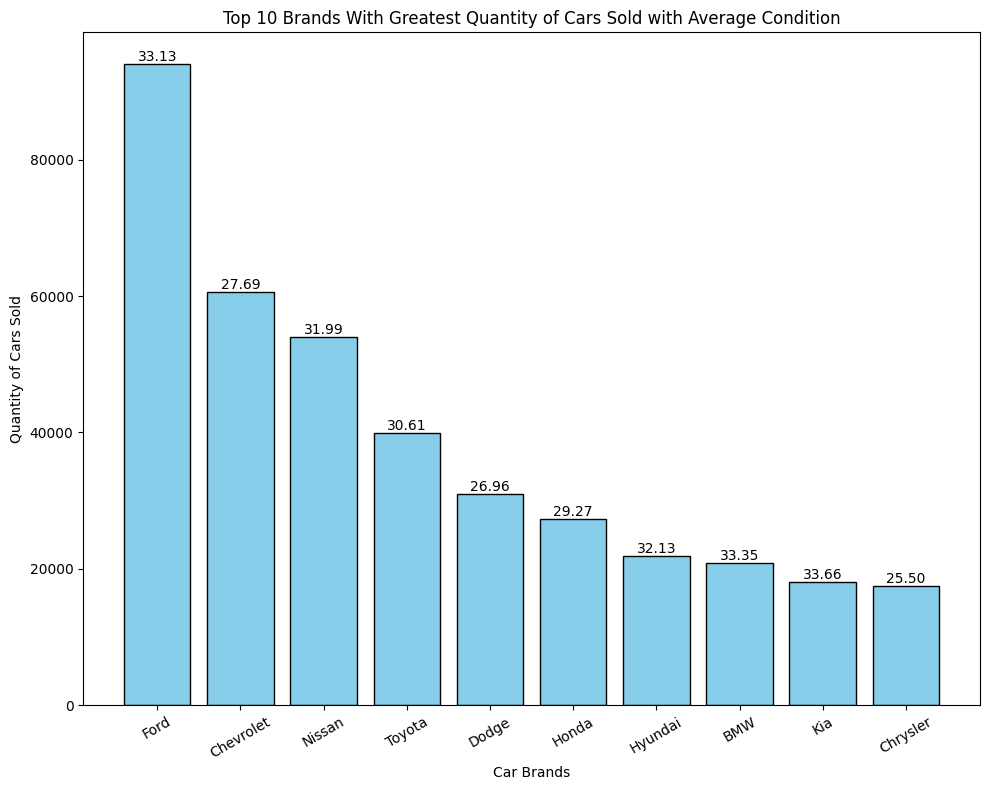

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

amount_make = df['make'].value_counts()
top_ten = amount_make.head(10)

average_condition = df.groupby('make')['condition'].mean().loc[top_ten.index]

plt.figure(figsize=(10, 8))
bars = plt.bar(top_ten.index, top_ten.values, color='skyblue', edgecolor='black')

for bar, condition in zip(bars, average_condition):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{condition:.2f}',
             ha='center', va='bottom', color='black')

plt.title('Top 10 Brands With Greatest Quantity of Cars Sold with Average Condition')
plt.xlabel('Car Brands')
plt.ylabel('Quantity of Cars Sold')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.savefig('top_10_car_brands_histogram.png')




# Analysing Top 10 Car Models
- Popular car models and their average selling price

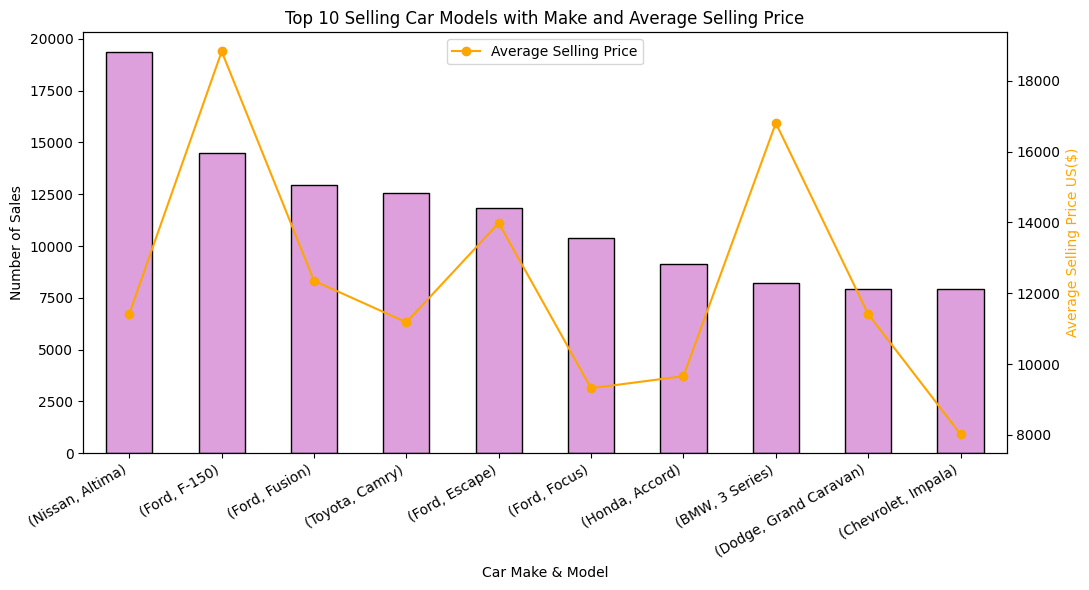

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

top_selling_models = df.groupby(['make', 'model']).size().nlargest(10)
top_models_df = df[df[['make', 'model']].apply(tuple, axis=1).isin(top_selling_models.index)]

average_selling_price = top_models_df.groupby(['make', 'model'])['sellingprice'].mean()

common_index = top_selling_models.index.intersection(average_selling_price.index)

fig, ax1 = plt.subplots(figsize=(11,6))

top_selling_models.loc[common_index].plot(kind='bar', color='plum', edgecolor='black', ax=ax1)
ax1.set_ylabel('Number of Sales')
ax1.set_xlabel('Car Make & Model')
ax1.set_title('Top 10 Selling Car Models with Make and Average Selling Price')
ax1.set_xticklabels(common_index, rotation=30, ha='right')

ax2 = ax1.twinx()
average_selling_price.loc[common_index].plot(kind='line', color='orange', marker='o', ax=ax2, label='Average Selling Price')
ax2.set_ylabel('Average Selling Price US($)', color='orange')

ax2.legend(loc='upper center')

plt.tight_layout()
plt.show()




# Feature: Odometer

<ipython-input-21-809b318de676>:4: DtypeWarning: Columns (0,1,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_car_prices.csv')


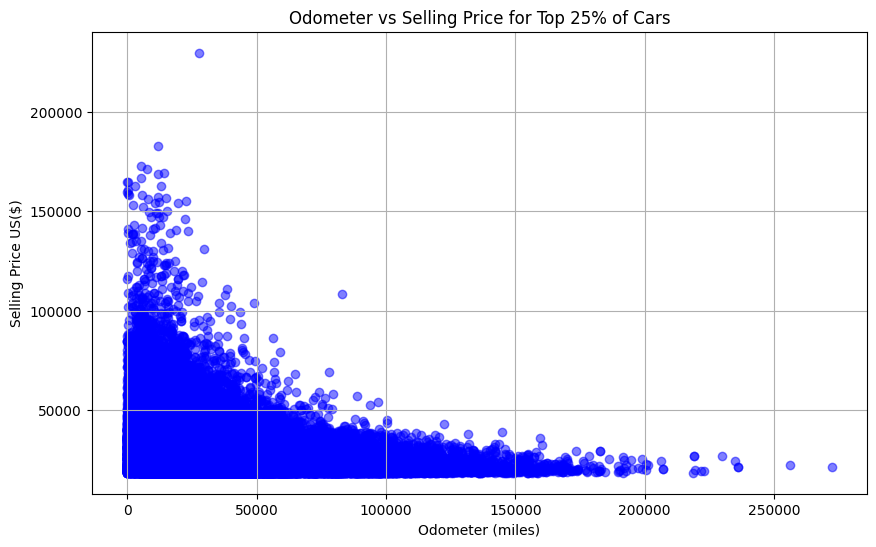

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

df_sorted = df.sort_values('sellingprice', ascending=False)

top_25= df_sorted['sellingprice'].quantile(0.75)
top_25_cars = df_sorted[df_sorted['sellingprice'] >= top_25]

plt.figure(figsize=(10, 6))
plt.scatter(top_25_cars['odometer'], top_25_cars['sellingprice'], color='blue', alpha=0.5)

plt.title('Odometer vs Selling Price for Top 25% of Cars')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price US($)')

plt.grid(True)
plt.show()



# Profit on Car Sale
- Analyis of the profit made on car sale based on the difference between selling price and expected value of vehicle given by 'Manheim Market Report' (MMR)

<ipython-input-22-492f7be77afd>:4: DtypeWarning: Columns (0,1,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_car_prices.csv')


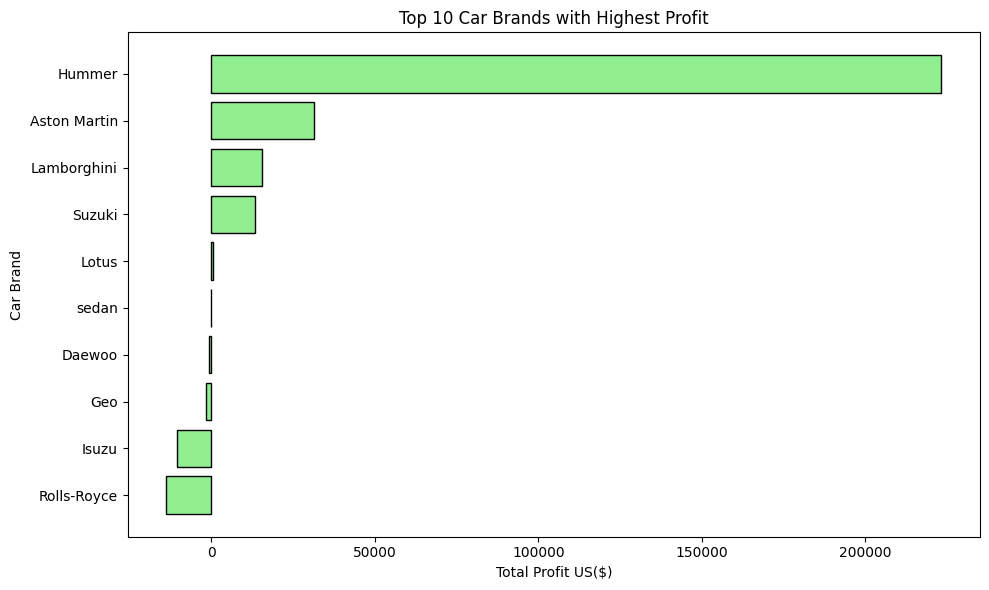

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

df['sellingprice'] = pd.to_numeric(df['sellingprice'])
df['mmr'] = pd.to_numeric(df['mmr'])

df['profit'] = df['sellingprice'] - df['mmr']

brand_profit = df.groupby('make')['profit'].sum()

top_brands = brand_profit.nlargest(10)

plt.figure(figsize=(10, 6))
plt.barh(top_brands.index, top_brands.values, color='lightgreen', edgecolor='black')
plt.xlabel('Total Profit US($)')
plt.ylabel('Car Brand')
plt.title('Top 10 Car Brands with Highest Profit')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_10_profitable_car_brands.png')


<ipython-input-23-d00ce9fe246b>:5: DtypeWarning: Columns (0,1,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cleaned_car_prices.csv')


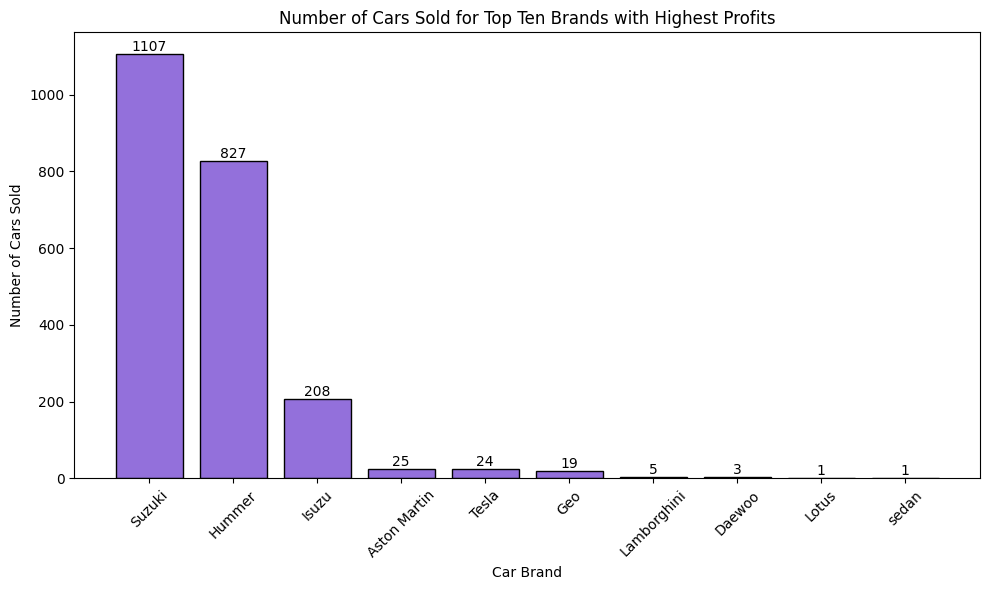

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

df['profit'] = df['sellingprice'] - df['mmr']

brand_profit = df.groupby('make')['profit'].sum().reset_index()
brand_profit = brand_profit.sort_values(by='profit', ascending=False)

top_ten_brands = brand_profit.head(10)
top_ten_sales = df[df['make'].isin(top_ten_brands['make'])]

sales_count = top_ten_sales['make'].value_counts().reset_index()
sales_count.columns = ['make', 'sales_count']

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_count['make'], sales_count['sales_count'], color='mediumpurple', edgecolor = 'black')
plt.xlabel('Car Brand')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars Sold for Top Ten Brands with Highest Profits')
plt.xticks(rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.show()


# Feature: Car Manufacture Year
- Analysing the trends relating to year of manufacture


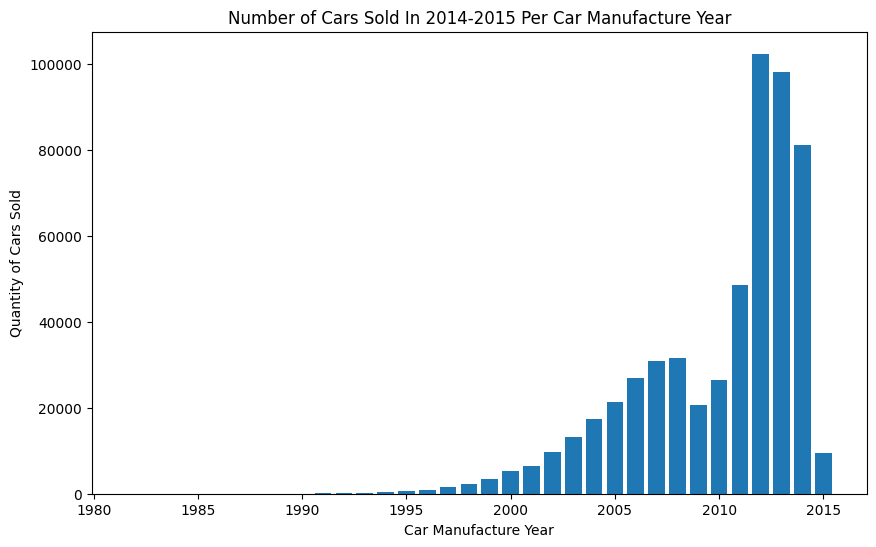

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_car_prices.csv')

year_of_manufacture = df.groupby('year').size()

plt.figure(figsize=(10, 6))
plt.bar(year_of_manufacture.index, year_of_manufacture.values)
plt.xlabel('Car Manufacture Year')
plt.ylabel('Quantity of Cars Sold')
plt.title('Number of Cars Sold In 2014-2015 Per Car Manufacture Year')
plt.show()
plt.savefig('Car_Manufacture_Year_Distribution.png')

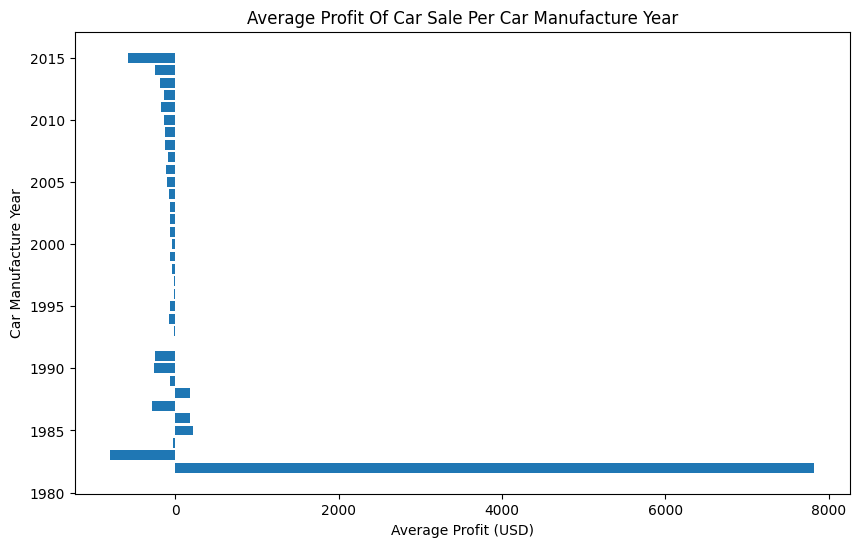

In [ ]:
df['profit'] = df['sellingprice'] - df['mmr']
average_profit_per_year = df.groupby('year')['profit'].mean()

plt.figure(figsize=(10, 6))
plt.barh(average_profit_per_year.index, average_profit_per_year.values)
plt.ylabel('Car Manufacture Year')
plt.xlabel('Average Profit (USD)')
plt.title('Average Profit Of Car Sale Per Car Manufacture Year')
plt.show()


